In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "(dc#COVID19Vaccine OR #antivaxxers OR #COVID19 OR #vaccine OR #vaccineinjuries OR #VaccineDeaths OR #VaccineSideEffects OR #vaccination OR #pandemic) min_faves:2 -filter:links"
tweets = []
limit = 500


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)
df.to_csv('tweets.csv')


<ipython-input-8-2fb1a57d3fb5>:14: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                         Date           User  \
0   2022-11-25 19:55:18+00:00        natou13   
1   2022-11-23 10:57:03+00:00  Lizmauricephd   
2   2022-11-22 01:35:30+00:00   chidambara09   
3   2022-11-06 02:01:59+00:00        Ninad_M   
4   2022-10-28 10:16:25+00:00         UKPoTS   
..                        ...            ...   
495 2021-04-29 14:07:55+00:00  KashmirRoshan   
496 2021-04-29 13:48:30+00:00        Ibon_dc   
497 2021-04-29 10:32:17+00:00      itsaditti   
498 2021-04-29 06:57:01+00:00       Ani1mesh   
499 2021-04-28 13:26:11+00:00      itsaditti   

                                                 Tweet  
0    @EricSALATprof @Pyramideprince @132_dc Entière...  
1    When will a statue of Dr Fauci be erected in W...  
2    @enilev @KingsCollegeLon @IanLJones98 @GlenGil...  
3    Excited to be at #AMIA2022. Ping me on the dis...  
4    @Lichfield_DC Thank you so much for supporting...  
..                                                 ...  
495  #COVID19 \n\nSome S

In [ ]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from scipy.special import softmax
import math
import pandas as pd
# print(data.head())
#preprocess
p=0;
n=0;
ne=0;
for i in range(500):
    twt=data[i]
    tweet_words=[]
    for word in twt.split(' '):
      if word.startswith("@") and len(word)>1:
        word=''
      elif word.startswith('http'):
        word=""
      tweet_words.append(word)
    # print(tweet_words)
    twt_pro=' '.join(tweet_words)
    #load the model and tokenizer
    rob="cardiffnlp/twitter-roberta-base-sentiment"  #from the hugging.face
    model=AutoModelForSequenceClassification.from_pretrained(rob)
    tokenizer=AutoTokenizer.from_pretrained(rob)
    lb=['Negative','Neutral','Positive']

    #sentiment Analysis
    encoded_tweet=tokenizer(twt_pro,return_tensors='pt')
    out=model(encoded_tweet['input_ids'],encoded_tweet['attention_mask'])
    s=out[0][0].detach().numpy()
    s=softmax(s)
    mp=s[0]
    # print(s)
    # print(mp)
    j=s[0]
    k=lb[0]
    if s[2]>0.5:
      p=p+1
    elif s[0]>0.5:
      n=n+1
    else:
      ne=ne+1

      # if v%1==0:
    print(lb[0],lb[1],lb[2],"\n",s[0],"\n",s[1],"\n",s[2],"\n")
      # v+=1
print(p)
print(n)
print(ne)


Negative Neutral Positive 
 0.10902908 
 0.85759443 
 0.033376355 

Negative Neutral Positive 
 0.16320464 
 0.5351478 
 0.30164766 

Negative Neutral Positive 
 0.074889325 
 0.8677492 
 0.05736129 

Negative Neutral Positive 
 0.00084661413 
 0.014425669 
 0.9847277 

Negative Neutral Positive 
 0.027446054 
 0.12838182 
 0.8441722 

Negative Neutral Positive 
 0.0008429549 
 0.012218143 
 0.986939 

Negative Neutral Positive 
 0.05808832 
 0.3179103 
 0.6240014 

Negative Neutral Positive 
 0.12893482 
 0.8223252 
 0.04873993 

Negative Neutral Positive 
 0.46067625 
 0.49115545 
 0.048168287 

Negative Neutral Positive 
 0.0012913056 
 0.060944255 
 0.93776447 

Negative Neutral Positive 
 0.14956056 
 0.8047065 
 0.045732863 

Negative Neutral Positive 
 0.06686421 
 0.86635464 
 0.066781074 

Negative Neutral Positive 
 0.001989163 
 0.04551026 
 0.9525006 

Negative Neutral Positive 
 0.009715041 
 0.12281323 
 0.86747175 

Negative Neutral Positive 
 0.047717214 
 0.3331076 
 0

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New section

In [ ]:
pip install scipy.special

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy.special (from versions: none)
ERROR: No matching distribution found for scipy.special


In [ ]:
data=pd.read_csv("/content/tweets.csv")
data=data['Tweet']


In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re

text = u'This dog \U0001f602'
x='🥴 is  😂 the jhkjndjh'


emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F600-\U0001F64F"
        u"\U00000531-\U00000DF4"
        u"\U00000900-\U0000097F"
        u"\U00000021-\U0000002F"
        u"\U0000003A-\U00000040"
        u"\U0000007B-\U000000FF"
        u"\U0000005B-\U00000060"
        u"\U00000021"
        u"\U0000003F"
        u"\U0000005F"
        u"\U00000022"
        u"\U0000003A"
        u"\U00000027"
        u"\U0000003B"
        u"\U0001F974"
        u"\U0001FA94"
        u"\U00002639"
        u"\U00002764"
        u"\U0001F9D0"
        u"\U0001F9A0"
        u"\U00002620"
        u"\U0001F92C"
        u"\U0001F923"
        u"\U0001F975"
        u"\U0001F91E"
        u"\U00002714"
        u"\U0001F9EA"
        u"\U0001F929"
        u"\U0000270A"
        u"\U00002744"
        u"\U00002705"
        u"\U00002B55"
        u"\U0001F914"
        u"\U00002640"
        u"\U00002611"
        u"\U0000260B"
        u"\U0001F911"
        u"\U0001F928"
        u"\U0001F914"
        u"\U0001F92B"
        u"\U0001F95F"
        u"\U00002795"
        u"\U00002642"
        u"\U00002708"
        u"\U0001F92A"
        u"\U00002B50"
        u"\U0001F937"
        u"\U00002019"
        u"\U0000270B"
        u"\U0000201D"
        u"\U0000201C"
        u"\U0001FAA7"
        u"\U0001F7CA"
        u"\U00002605"
        u"\U00002614"
        u"\U000026AA"




        
       
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji
print(data[1])
print(emoji_pattern.sub(r'',data[1]))
print(emoji_pattern.sub(r'',x))
for i in range(len(data)):
  data[i]=emoji_pattern.sub(r'',data[i])
  print(data[i])

This dog 
When will a statue of Dr Fauci be erected in Washington DC The man saved us  we would all have died from Covid if not for him 

COVID19
When will a statue of Dr Fauci be erected in Washington DC The man saved us  we would all have died from Covid if not for him 

COVID19
 is   the jhkjndjh
EricSALATprof Pyramideprince 132dc Entirement d accord EricSALATprof vaccination grippe soignants
When will a statue of Dr Fauci be erected in Washington DC The man saved us  we would all have died from Covid if not for him 

COVID19
enilev KingsCollegeLon IanLJones98 GlenGilmore SpirosMargaris BetaMoroney drsharwood Nicochan33 HaroldSinnott mvollmer1 psbdc KhuloodAlmani tobiaskintzel Fabriziobustama enricomolinari RLDILamy jeancayeux mdrechsler mikeflache MikeNashTech SwissCognitive Phase 3 Clinical Trial BrainCancer Vaccine 
Shows Promising Results 
KingsCollegeLon

ThAnk  U 
mymom 

bigdata 
Twitter 
SOciaLmediA 

Excited to be at AMIA2022 Ping me on the discussion on CDS ECR HIV COVID19

In [ ]:
dt=data.to_csv("/content/final twitterfiltered .csv")

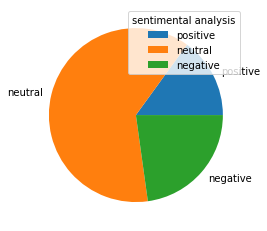

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

w = np.array([p,ne,n])
mylabels = ["positive","neutral","negative"]

plt.pie(w, labels = mylabels)
plt.legend(title = "sentimental analysis")
plt.show() 

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


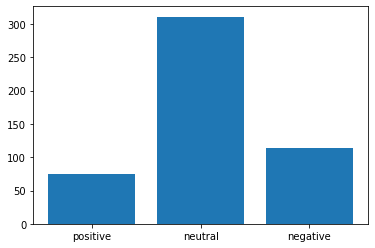

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

g = np.array(["positive", "neutral", "negative"])
h = np.array([p,ne,n])

plt.bar(g,h)
plt.show()

(array([ 9., 16., 15., 14., 22., 18.,  8.,  6.,  1.,  5.]),
 array([-351.64138909, -223.70892582,  -95.77646256,   32.15600071,
         160.08846398,  288.02092725,  415.95339052,  543.88585379,
         671.81831706,  799.75078032,  927.68324359]),
 <a list of 10 Patch objects>)

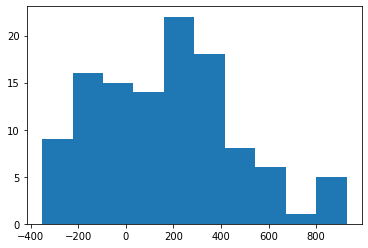

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

z = np.random.normal(p,ne,n)

plt.hist(z)

In [ ]:
data=pd.read_csv('/content/final twitterfiltered .csv')
data.columns


Index(['Unnamed: 0', 'Tweet'], dtype='object')